# Credit Card Fraud Detection
Description: Prediction of Fraud in Credit card transation

## 1 Some basic Stuffs
Importing libraries <br>
Loading data <br>
Seeing the basic structure of data etc

### 1.1 Import required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 1.2 Load Data

In [3]:
credit_fraud=pd.read_csv("creditcard.csv")

### 1.3 See the basic structure of data

In [4]:
credit_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# See the list of columns in the data
credit_fraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
credit_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
credit_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

`So there is no missing values in the data and also we can see that other than "Class" all features has floating point number`

## 2 Exploratory Data analysis
Trying to plot differnt features <br>
Trying to see the ditribution of the features <br>
Trying to get inferences from the different type of visualisation etc

### 2.1 See the distribution of the data

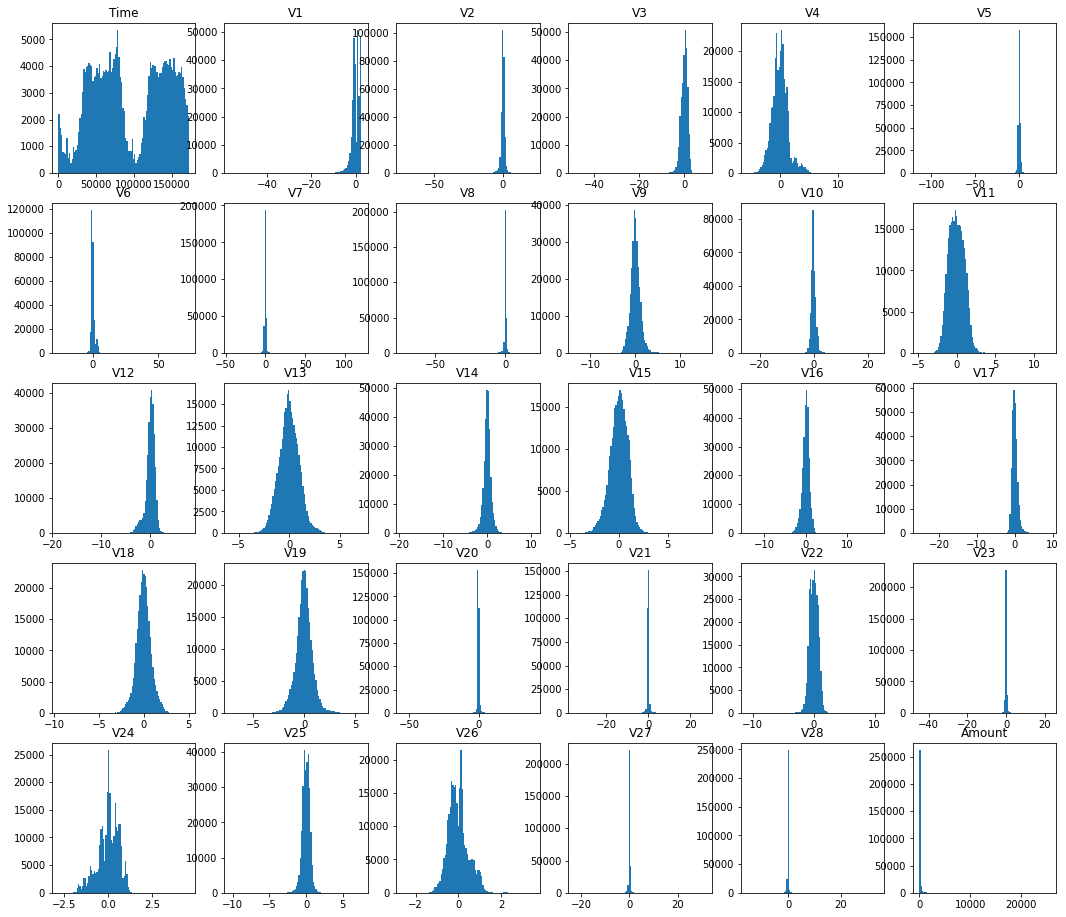

In [8]:
fig,axs=plt.subplots(5,6)
for i in range(5):
    for j in range(6):
        axs[i,j].hist(credit_fraud[credit_fraud.columns[6*i+j]], bins=100)
        axs[i,j].set_title(credit_fraud.columns[6*i+j])
fig.set_size_inches(18,16)

`From the above histogram plot we can see that allmost all the variables have gaussian type distribution and all the variable are center at zero so we don't have scale them but it can be seen that there are some variable with some skewness.`

### 2.2 Lets check for skewness of the features

In [27]:
# See the features with more than 0.5 or less that -0.5 skew
skew=credit_fraud.skew()
# Take absolute value of skew and then get all the columns whose absolute value of skew is more than 0.5
skewed=skew[np.abs(skew)>0.5]
print(skewed)
print("The total number of features with skewness more than 0.5 or less than -0.5 are ", len(skewed))

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V12       -2.278401
V14       -1.995176
V16       -1.100966
V17       -3.844914
V20       -2.037155
V21        3.592991
V23       -5.875140
V24       -0.552499
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64
The total number of features with skewness more than 0.5 or less than -0.5 are  23


`We will see whether we can handle these skewness by resampling or not.`

### 2.3 See the structure of target variable

In [10]:
# Lets see the unique values of the target coulmn
credit_fraud.Class.unique()

array([0, 1])

In [11]:
# see the value count of the target
credit_fraud.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
# Lets see the percentage of data points in class 1 and class 0
credit_fraud.Class.value_counts()/len(credit_fraud.Class)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

`So, here around 99.8% of data are with class 0 and only 0.17% data are with class 1 so it is a very high class inbalance. So we need to handle class inbalance`

## 3 Train test split of the data set

In [14]:
X = credit_fraud.drop(columns=["Class"])
y = credit_fraud["Class"]

In [15]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [24]:
# spliting the data into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=100)

## 4 Treatment of Data imbalance
Trying differnt technique to handle class imbalance

### 4.1 Using RandomOverSampler

In [25]:
ros=RandomOverSampler(random_state=100)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [31]:
# Lets see the target value count
y_train_ros.value_counts()

1    213236
0    213236
Name: Class, dtype: int64

In [26]:
# See the features with more than 0.5 or less that -0.5 skew
skew=X_train_ros.skew()
# Take absolute value of skew and then get all the columns whose absolute value of skew is more than 0.5
skewed=skew[np.abs(skew)>0.5]
print(skewed)
print("The total number of features with skewness more than 0.5 or less than -0.5 are ", len(skewed))

V1       -2.621021
V2        1.574717
V3       -2.200628
V4        0.815192
V5       -2.235071
V7       -2.872788
V8       -3.848910
V9       -1.398896
V10      -1.801208
V11       1.026376
V12      -1.336531
V14      -0.977483
V16      -1.389266
V17      -1.537865
V18      -1.395348
V20       2.388969
V21       2.843322
V22      -0.961395
V23      -7.028643
V25      -0.866198
V26       0.585745
V27      -2.701067
V28       1.894051
Amount    7.908195
dtype: float64
The total number of features with skewness more than 0.5 or less than -0.5 are  24


`We can see that there is some improvement in skew like before resampling skew of V28 was 11.18 and now it is 1.8`

### 4.2 Using ADASYN

In [28]:
ada=ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [30]:
# Lets see the target value count
y_train_ada.value_counts()

1    213326
0    213236
Name: Class, dtype: int64

In [29]:
# See the features with more than 0.5 or less that -0.5 skew
skew=X_train_ada.skew()
# Take absolute value of skew and then get all the columns whose absolute value of skew is more than 0.5
skewed=skew[np.abs(skew)>0.5]
print(skewed)
print("The total number of features with skewness more than 0.5 or less than -0.5 are ", len(skewed))

V1       -2.677186
V2        1.467450
V3       -2.242299
V4        0.738111
V5       -2.445848
V6        0.506260
V7       -2.853287
V8       -3.151516
V9       -1.284338
V10      -1.743542
V11       1.020980
V12      -1.293444
V14      -0.913823
V15      -0.516820
V16      -1.419057
V17      -1.655788
V18      -1.517795
V20       2.101616
V21       2.119147
V23      -5.950933
V25      -0.527899
V26       0.504671
V27      -2.459204
V28       2.605804
Amount    9.884854
dtype: float64
The total number of features with skewness more than 0.5 or less than -0.5 are  25


`We can see that there is some improvement in skew like before resampling skew of V28 was 11.18 and now it is 2.60`

### 4.3 Using SMOTE

In [32]:
smote=SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [33]:
# Lets see the target value count
y_train_smote.value_counts()

1    213236
0    213236
Name: Class, dtype: int64

In [34]:
# See the features with more than 0.5 or less that -0.5 skew
skew=X_train_smote.skew()
# Take absolute value of skew and then get all the columns whose absolute value of skew is more than 0.5
skewed=skew[np.abs(skew)>0.5]
print(skewed)
print("The total number of features with skewness more than 0.5 or less than -0.5 are ", len(skewed))

V1        -2.502397
V2         1.425324
V3        -2.093679
V4         0.697488
V5        -2.263280
V7        -2.549032
V8        -3.126013
V9        -1.215414
V10       -1.653089
V11        0.957643
V12       -1.293389
V14       -0.895239
V15       -0.500019
V16       -1.420054
V17       -1.589408
V18       -1.453956
V19        0.507652
V20        1.874910
V21        3.538170
V22       -1.416306
V23       -5.253259
V27       -2.626754
V28        2.582449
Amount    10.144061
dtype: float64
The total number of features with skewness more than 0.5 or less than -0.5 are  24


`We can see that there is some improvement in skew like before resampling skew of V28 was 11.18 and now it is 2.58`

## 5 Training Different models
